# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print('successful')

successful


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = [32,32,3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = [32, 32, 3]
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

38


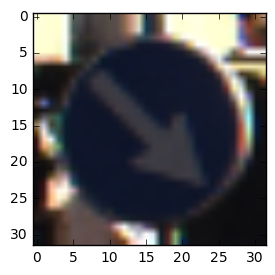

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(3,3))
plt.imshow(image)
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

print(X_train[0, 0])

[[32 33 27]
 [35 35 32]
 [37 40 32]
 [33 33 26]
 [34 32 26]
 [35 34 27]
 [30 31 26]
 [28 32 28]
 [34 37 30]
 [41 40 31]
 [44 41 33]
 [35 35 29]
 [35 35 31]
 [40 37 31]
 [41 39 32]
 [38 37 30]
 [39 37 30]
 [37 37 29]
 [40 37 30]
 [43 37 29]
 [41 36 31]
 [43 41 32]
 [47 43 30]
 [42 39 28]
 [41 37 29]
 [41 38 30]
 [37 36 29]
 [35 35 28]
 [33 31 27]
 [31 31 27]
 [32 32 28]
 [33 31 27]]


In [5]:
import tensorflow as tf

epochs = 12
batch_size = 100

In [6]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.05
    weights = {
                'layer_1': tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma)),
                'layer_2': tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
              }
    bias = {
                'layer_1': tf.Variable(tf.zeros(6)),
                'layer_2': tf.Variable(tf.zeros(16))
            }
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1 = tf.nn.conv2d(x, weights['layer_1'], strides=[1, 1, 1, 1], padding='VALID')
    conv1 = tf.nn.bias_add(conv1, bias['layer_1'])
    
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2 = tf.nn.conv2d(conv1, weights['layer_2'], strides=[1, 1, 1, 1], padding = 'VALID')
    conv2 = tf.nn.bias_add(conv2, bias['layer_2'])
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    flattened = flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    l3_weights = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    l3_bias = tf.Variable(tf.zeros(120))
    layer_3 = tf.matmul(flattened, l3_weights) + l3_bias
    
    # TODO: Activation.
    layer_3 = tf.nn.relu(layer_3)
    
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    l4_weights = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    l4_bias = tf.Variable(tf.zeros(84))
    layer_4 = tf.matmul(layer_3, l4_weights) + l4_bias
    
    # TODO: Activation.
    layer_4 = tf.nn.relu(layer_4)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    l5_weights = tf.Variable(tf.truncated_normal(shape=(84, 43), mean=mu, stddev=sigma))
    l5_bias = tf.Variable(tf.zeros(43))
    logits = tf.matmul(layer_4, l5_weights) + l5_bias
    
    return logits

In [7]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3), name='x')
y = tf.placeholder(tf.int32, (None), name='y')
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


In [8]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Training...

EPOCH 1 ...
Validation Accuracy = 0.876

EPOCH 2 ...
Validation Accuracy = 0.929

EPOCH 3 ...
Validation Accuracy = 0.960

EPOCH 4 ...
Validation Accuracy = 0.965

EPOCH 5 ...
Validation Accuracy = 0.959

EPOCH 6 ...
Validation Accuracy = 0.969

EPOCH 7 ...
Validation Accuracy = 0.959

EPOCH 8 ...
Validation Accuracy = 0.970

EPOCH 9 ...
Validation Accuracy = 0.974

EPOCH 10 ...
Validation Accuracy = 0.974

EPOCH 11 ...
Validation Accuracy = 0.964

EPOCH 12 ...
Validation Accuracy = 0.978



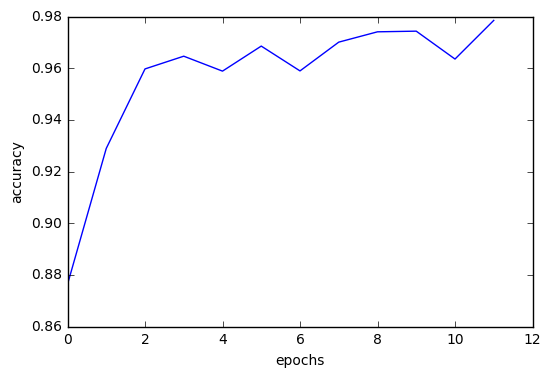

Model saved


In [9]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    acc = []
    for i in range(epochs):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        acc.append(validation_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'traffic')
    plt.plot(acc)
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.show()
    print("Model saved")

In [10]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('traffic.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.915


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [ ]:
I did not do much pre-processing of the data besides shuffling it.  This shuffling ensured that the order of the data
would not influence the model.  I did not convert to greyscale because I had read that this would not significantly
alter my results, and since all of the images are of the same size, I did not think it to be important to normalize
the data.  

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [ ]:
I preproccesed the data using the sklearn train_test_split function.  This allows me to perform cross-validation with 
the training data.  I set aside 30% to be the validation sets, and found to get
the best results by splitting up the training and testing data with this number.  I wanted to use cross-validation
because it would give me the most accurate results when comparing new signs that the model had never seen before in
Part 3.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [ ]:
My final architecture is the LeNet Convolutional Neural Network.  It has two convolutional layers and three fully connected layers.
I decreased the standard deviation of the randomly distributed weights in order to start with weights more similar to each other in the 
convolutional layers.  I also had to modify the size of the weights and bias to match the RGB depth of the images.
After that, I used a ReLU activation function, and decided not to use dropout (after testing with it) because I found
that since the dataset is not enormous, my dropout function only removed potentially significant data points from
the model.  




### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

In [ ]:
I used the AdamOptimize function to optimize my model, finding it to be more robust than the GradientDescentOptimizer
function.  After testing different batch sizes, epochs, and learning rates, I settled on 12 epochs and a batch size of 100.
These gave me the most accurate results.  The learning rate of 0.001 also gave me the most accurate results, because 
after a certain amount of epochs, my model was prone to overfitting, so I wanted to ensure that a higher learning rate
would not cause too much unnecessary momentum during gradient descent and backpropogation.  

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

In [ ]:
My model was built on mostly trial and error.  I had a decent idea of what would work starting off, and wanted to
test my hypotheses by running the model many times.  I tested each hyperparameter to see what would have the most significant
positive effect.  I first started off with batch size, and found 100 to give me the best results.  Epochs of 12 allowed my
model to train to the optimal point without overfitting with the current learning rate.  I found that when I increased
the learning rate, my model would become overfitted.  I was surprised to find that decreased the standard deviation
of my random weights in the beginning of the neural network would have such a profound effect on my model.  Once I realized
that decreasing the SD would improve the accuracy of my model, I settled on 0.05 and tested the rest of the hyperparameters
from there.  

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(32, 32, 3)


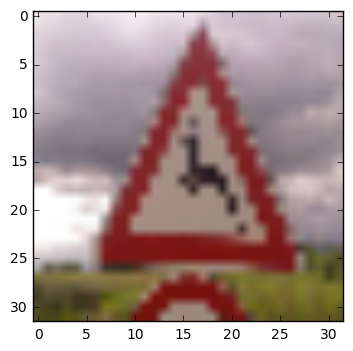

In [12]:
import cv2
import matplotlib.image as mpimg


image1 = mpimg.imread('./traffic signs/deer.jpg')
image2 = mpimg.imread('./traffic signs/noparking.jpg')
image3 = mpimg.imread('./traffic signs/railroad.jpg')
image4 = mpimg.imread('./traffic signs/Roundabout.jpg')
image5 = mpimg.imread('./traffic signs/stop.jpg')

images = [image1, image2, image3, image4, image5]
new_images = []


for i in images:
    p = cv2.resize(i, (32, 32))
    new_images.append(p)



plt.imshow(new_images[0])
print(new_images[0].shape)



[31 36  1 22 14]
TopKV2(values=array([[  9.98076320e-01,   1.54509977e-03,   1.65672303e-04],
       [  1.00000000e+00,   4.15509776e-14,   6.35499497e-19],
       [  9.93676245e-01,   6.32229447e-03,   1.19399976e-06],
       [  9.99993205e-01,   4.92994604e-06,   1.43627040e-06],
       [  9.99999285e-01,   6.83532051e-07,   3.36565154e-09]], dtype=float32), indices=array([[31, 11, 21],
       [36,  3, 35],
       [ 1, 25, 27],
       [22, 25, 13],
       [14,  1, 25]], dtype=int32))


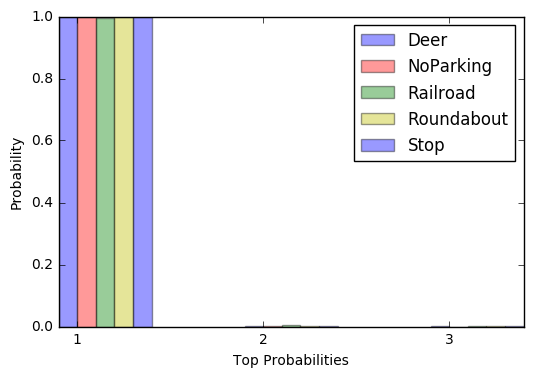

In [22]:
new_images = np.array(new_images).astype(float)
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('traffic.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    
    new_logits = tf.nn.softmax(logits)
    get_new_prediction = tf.argmax(new_logits, 1)
    new_pred = sess.run(get_new_prediction, feed_dict={x: new_images})
    certainty = sess.run(tf.nn.top_k(new_logits, k=3), feed_dict={x: new_images})
print(new_pred)
print(certainty)

n_groups = 3
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.4
rects1 = plt.bar(index, certainty[0][0], bar_width,
                alpha=opacity, color='b', label='Deer'
               )
rects2 = plt.bar(index + bar_width, certainty[0][1], bar_width,
                alpha=opacity, color='r', label='NoParking'
               )

rects3 = plt.bar(index + bar_width*2, certainty[0][2], bar_width,
                alpha=opacity, color='g', label='Railroad'
               )
rects4 = plt.bar(index + bar_width*3, certainty[0][3], bar_width,
                alpha=opacity, color='y', label='Roundabout'
               )
rects5 = plt.bar(index + bar_width*4, certainty[0][4], bar_width,
                alpha=opacity, color='b', label='Stop'
               )

plt.xlabel('Top Probabilities')
plt.ylabel('Probability')
plt.xticks(index + bar_width, ('1', '2', '3'))
plt.legend()
plt.show()
    
    

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

I dont believe that any of the inherent qualities in these images would make classification difficult.  What might
make it difficult for the algorithm to determine the pictures is that during resizing, they become a bit blurry.  In
addition, 3 out of the 5 pictures I chose werent labeled in the given traffic dataset.  I was curious what the output
would be for these, and how the classifier would view them.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

My model predicted 2 out of 5 signs correctly (the correct ones being the stop sign and wild animal).  3 of the images were not 
in the traffic dataset (roundabout, no parking, and railroad signs) so I wasnt surprised that the model did not accurately
detect these.  The one I believe it should have detected correctly was the roundabout sign, but the roundabout sign
I uploaded was slightly different than the one in the traffic set.  

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

In [ ]:
The model accurately predicted the wild animal and stop sign signs, both with accuracies of 99%.  What was interesting
was that it predicted with 100% accuracy that the railroad sign was a "go straight or right" sign. What was also interesting
was that the top probability for the most probably sign was incredibly high (basically 100%), while the next probability
was extremely low.  I wanted to demonstrate this with the bar graph.  The model seemed certain of one sign, and very 
uncertain of other signs (less than 1% in every case).  This could have been because it predicted 2 of the signs
with almost 100% accuracy, while the 3 other signs not labeled in the training set fooled the algorithm.  Surprisingly,
with this foreign data, the algorithm was highly certain it knew what these signs were.  

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.